In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [138]:
base_url = "https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2"
vers = 8
rev = 1


In [139]:
def make_month_url(year, month, base_url=base_url):
    return f"{base_url}/{year}/{str(month).zfill(2)}/"



In [148]:
#month_url = make_month_url(2015, 9)
#month_url = make_month_url(2015, 4)
month_url = make_month_url(2020, 6)
month_url_2 = make_month_url(2020, 7)
month_url

'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2020/06/'

In [149]:
import requests
from bs4 import  BeautifulSoup

In [150]:
def get_all_csv_filenames(url):
    req = requests.get(url)
    soup=BeautifulSoup(req.text)
    return [s for s in [x["href"] for x in soup.find_all("a", href=True)] if "csv" in s]

def create_csv_urls(month_url, filenames):
    return [month_url+f for f in filenames]


In [151]:
ion_files = [x for x in get_all_csv_filenames(month_url) if "ion" in x]
ion_files_2 = [x for x in get_all_csv_filenames(month_url_2) if "ion" in x]
ion_urls = create_csv_urls(month_url, ion_files)
ion_urls_2 = create_csv_urls(month_url_2, ion_files_2)
ion_urls = ion_urls + ion_urls_2
len(ion_urls)

316

In [153]:
dfs = []
for f in ion_urls:
    df = pd.read_csv(f,na_values=[' ','NaN']).drop_duplicates()
    dfs.append(df)

In [154]:
all_ion = pd.concat(dfs, ignore_index=True)

In [155]:
all_ion

,t_utc,t_unix,t_sclk,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,sensitivity,SC_potential,precision,quality
0,2020-06-01T03:26:58,1.590982e+09,6.442539e+08,3707.483498,36790,11645,osion,443.6544,15.431110,-49.72621,27.03815,63.99323,2.0,592.665819,0.754302,550,-1.140906,0.041077,SCP
1,2020-06-01T03:27:04,1.590982e+09,6.442539e+08,3713.483498,36790,11645,osion,439.1295,15.438610,-49.63964,26.71275,63.90654,2.0,222.264248,0.282882,550,-0.941559,0.067076,SCP
2,2020-06-01T03:27:07,1.590982e+09,6.442539e+08,3716.483498,36790,11645,osion,436.8781,15.442220,-49.59649,26.54973,63.86199,2.0,481.557712,0.612892,550,-0.954433,0.045570,SCP
3,2020-06-01T03:27:10,1.590982e+09,6.442539e+08,3719.483498,36790,11645,osion,434.6341,15.445830,-49.55343,26.38648,63.81768,2.0,481.557712,0.612892,550,-1.022935,0.045570,SCP
4,2020-06-01T03:27:13,1.590982e+09,6.442539e+08,3722.483498,36790,11645,osion,432.3975,15.449440,-49.51047,26.22302,63.77362,2.0,222.264248,0.282882,550,-1.040295,0.067076,SCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956010,2020-08-01T00:20:13,1.596241e+09,6.495131e+08,4343.302762,37602,12051,osion,208.2332,8.379167,124.23840,53.48809,90.35409,57.0,37.039747,0.067345,550,0.000000,0.164311,SCP
3956011,2020-08-01T00:21:20,1.596241e+09,6.495131e+08,4410.302762,37602,12051,osion,207.0555,8.571111,126.84760,49.57996,86.37685,59.0,37.039747,0.067345,550,0.000000,0.164311,SCP
3956012,2020-08-01T00:22:13,1.596241e+09,6.495132e+08,4463.302762,37602,12051,osion,209.9540,8.702222,128.60080,46.44340,83.23187,59.0,37.039747,0.067345,550,0.000000,0.164311,SCP
3956013,2020-08-01T00:24:08,1.596241e+09,6.495133e+08,4578.302762,37602,12051,osion,227.8301,8.940278,131.70490,39.56912,76.44766,129.0,37.039747,0.067354,550,0.000000,0.164311,SCP


In [156]:
#tid_start = 17103
#tid_end = 17177
#tid_start = 15617
#tid_end = 15673
#tid_start = 25318 - 1 
#tid_end = 25400 + 1
tid_start = all_ion["tid"].min()
tid_end = all_ion["tid"].max()

ion_dd4 = all_ion[all_ion["tid"].between(tid_start, tid_end)]
ion_dd4_co2 = ion_dd4[ion_dd4["ion_mass"]==44]
ion_dd4_co2.reset_index()

,index,t_utc,t_unix,t_sclk,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,sensitivity,SC_potential,precision,quality
0,12046,2020-06-01T03:27:04,1.590982e+09,6.442539e+08,3713.483498,36790,11645,osion,439.1295,15.438610,-49.63964,26.712750,63.90654,44.0,3592.676578,4.572497,550,-0.941559,0.016684,SCP
1,12047,2020-06-01T03:27:07,1.590982e+09,6.442539e+08,3716.483498,36790,11645,osion,436.8781,15.442220,-49.59649,26.549730,63.86199,44.0,3148.206209,4.006808,550,-0.954433,0.017822,SCP
2,12048,2020-06-01T03:27:10,1.590982e+09,6.442539e+08,3719.483498,36790,11645,osion,434.6341,15.445830,-49.55343,26.386480,63.81768,44.0,3740.762846,4.760971,550,-1.022935,0.016350,SCP
3,12049,2020-06-01T03:27:13,1.590982e+09,6.442539e+08,3722.483498,36790,11645,osion,432.3975,15.449440,-49.51047,26.223020,63.77362,44.0,3592.676578,4.572497,550,-1.040295,0.016684,SCP
4,12050,2020-06-01T03:27:16,1.590982e+09,6.442539e+08,3725.483498,36790,11645,osion,430.1684,15.453330,-49.46759,26.059330,63.73300,44.0,3444.487853,4.383893,550,-1.041872,0.017039,SCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120662,3955056,2020-08-01T00:33:28,1.596242e+09,6.495139e+08,5138.302762,37602,12051,osion,519.9426,9.657500,140.19180,7.468127,46.39190,44.0,185.254347,0.336826,550,-1.022676,0.073471,SCP
120663,3955057,2020-08-01T00:33:31,1.596242e+09,6.495139e+08,5141.302762,37602,12051,osion,522.2781,9.660278,140.22280,7.309772,46.25325,44.0,37.039747,0.067345,550,-0.998186,0.164311,SCP
120664,3955058,2020-08-01T00:33:34,1.596242e+09,6.495139e+08,5144.302762,37602,12051,osion,524.6202,9.663056,140.25360,7.151601,46.11483,44.0,37.039747,0.067345,550,-0.875234,0.164311,SCP
120665,3955059,2020-08-01T00:33:37,1.596242e+09,6.495139e+08,5147.302762,37602,12051,osion,526.9690,9.666111,140.28440,6.993615,45.97363,44.0,111.195882,0.202174,550,-0.753348,0.094832,SCP


In [157]:
in_dfs = []
for orb_num, orb_data in ion_dd4_co2.groupby("orbit"):
    min_alt = orb_data["alt"].min()
    min_alt_index = orb_data["alt"].idxmin()
    if type(min_alt)==pd.Series:
        min_alt = min_alt.iloc[0]
    inbound = orb_data[orb_data["t_unix"] <= orb_data.loc[min_alt_index]["t_unix"]]
    in_dfs.append(inbound)

In [158]:
ion_dd4_co2_in = pd.concat(in_dfs)

In [159]:
ion_dd4_co2_in.groupby("orbit")["sza"].min()

orbit
11645    60.20103
11647    59.80129
11648    59.57417
11649    59.37088
11650    59.17225
           ...   
12046    86.01898
12047    86.38494
12049    87.05382
12050    87.11504
12051    87.50470
Name: sza, Length: 316, dtype: float64

In [162]:
new_df = []
for orb_num, orb_data in ion_dd4_co2_in.groupby("orbit"):
    peri = orb_data.loc[orb_data["alt"].idxmin()]
    if peri["sza"]>60 and peri["sza"]<66:
        new_df.append(orb_data)
new_df = pd.concat(new_df)
ion_dd4_co2_in = new_df
new_df["orbit"].nunique()

23

In [163]:
bins = np.arange(100, 500, 5)
bin_mids = (bins[0:-1] + bins[1:])/2
ion_dd4_co2_in["alt_bin"] = pd.cut(ion_dd4_co2_in["alt"], bins, labels=bin_mids)

In [164]:
avg = ion_dd4_co2_in[["alt_bin", "abundance"]].groupby("alt_bin").mean().rename(columns={"abundance": "abundance_mean"})
std = ion_dd4_co2_in[["alt_bin", "abundance"]].groupby("alt_bin").std().rename(columns={"abundance": "abundance_std"})
mx = ion_dd4_co2_in[["alt_bin", "abundance"]].groupby("alt_bin").max().rename(columns={"abundance": "abundance_max"})
avg = pd.merge(avg, std, left_index=True, right_index=True)
avg = pd.merge(avg, mx, left_index=True, right_index=True)
avg = avg.reset_index()
avg

,alt_bin,abundance_mean,abundance_std,abundance_max
0,102.5,NaN,NaN,NaN
1,107.5,NaN,NaN,NaN
2,112.5,NaN,NaN,NaN
3,117.5,NaN,NaN,NaN
4,122.5,NaN,NaN,NaN
...,...,...,...,...
74,472.5,NaN,NaN,NaN
75,477.5,NaN,NaN,NaN
76,482.5,NaN,NaN,NaN
77,487.5,NaN,NaN,NaN


Text(0, 0.5, 'Altitude [km]')

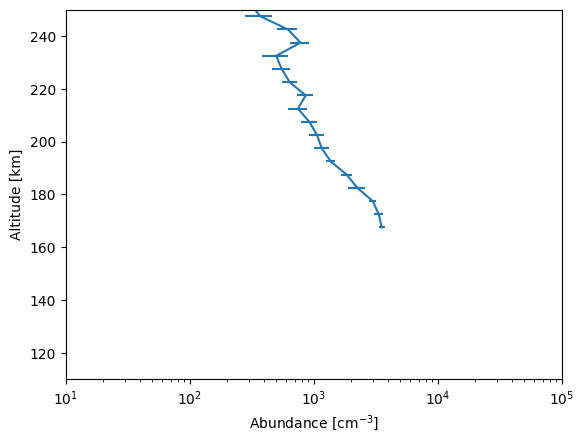

In [165]:
plt.errorbar(avg["abundance_max"], avg["alt_bin"], xerr=avg["abundance_std"])
#plt.plot(ydf["CO2+"], ydf["alt"])
plt.xscale("log")
plt.ylim(110, 250)
plt.xlim(10, 1.e+5)
plt.xlabel(r"Abundance [cm$^{-3}$]")
plt.ylabel("Altitude [km]")

In [23]:
avg.dropna().rename(columns={"alt_bin": "altitude"}).to_csv("../../Desktop/DD2_ion_44.csv", index=False)

In [24]:
avg.max()

alt_bin             492.500000
abundance_mean    17138.561040
abundance_std      2630.389334
dtype: float64

In [138]:
ydf = pd.read_csv(
    "../../Desktop/GDrive/data/yoshida_21_ion_densities/NGIMS_ion_neutral_density_variation_dataset/Vertical_profile_of_neutral_ion_density/Vertical_ion_Ls299-310.dat",
    header=1,
    names=["alt", "CO2+"],
    usecols=[0, 1],
    delim_whitespace=True
)

Text(0, 0.5, 'Altitude [km]')

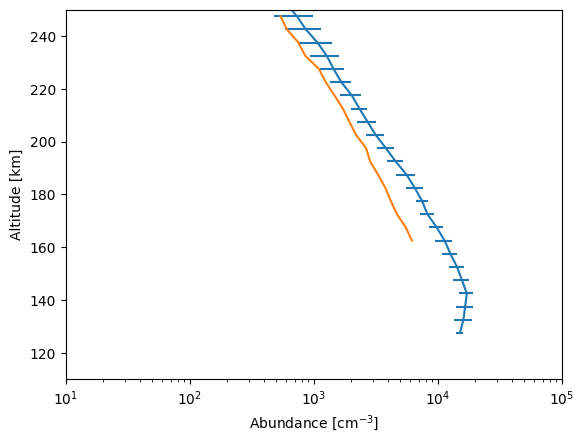

In [139]:
plt.errorbar(avg["abundance_mean"], avg["alt_bin"], xerr=avg["abundance_std"])
plt.plot(ydf["CO2+"], ydf["alt"])
plt.xscale("log")
plt.ylim(110, 250)
plt.xlim(10, 1.e+5)
plt.xlabel(r"Abundance [cm$^{-3}$]")
plt.ylabel("Altitude [km]")

In [136]:
5.e+3 * 4

20000.0